In [20]:
import pandas as pd
import numpy as np

In [21]:
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784',as_frame=True)
data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [22]:
from sklearn.model_selection import train_test_split

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [58]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [23]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

log_cls = LogisticRegression(C=1,max_iter=1000,random_state=42,class_weight='balanced')
log_cls.fit(X_train_scaled,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score,cross_val_predict

print(f'Train Accuracy: {log_cls.score(X_train_scaled,y_train)}')

val_score = cross_val_score(log_cls,X_train_scaled,y_train,cv=3,scoring='accuracy')

Train Accuracy: 0.9448571428571428


In [28]:
pd.DataFrame(val_score).describe()

,0
count,3.000000
mean,0.908679
std,0.000563
min,0.908127
25%,0.908392
50%,0.908657
75%,0.908955
max,0.909252


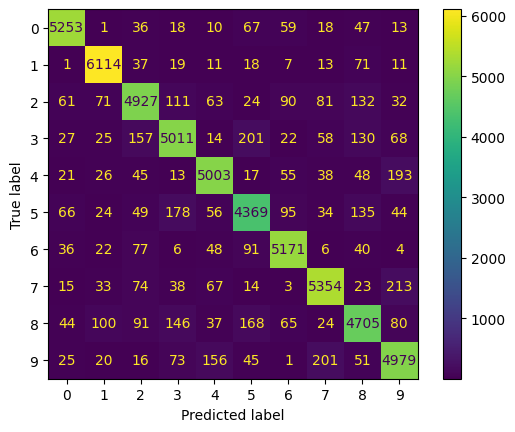

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_valid_pred = cross_val_predict(log_cls,X_train_scaled,y_train,cv=3,method='predict')

ConfusionMatrixDisplay.from_predictions(y_train,y_valid_pred)

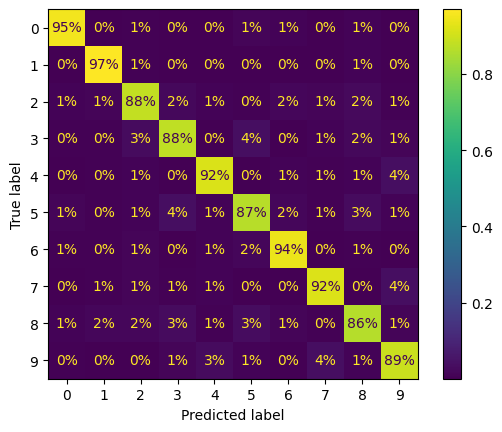

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred, normalize='true', values_format=".0%")

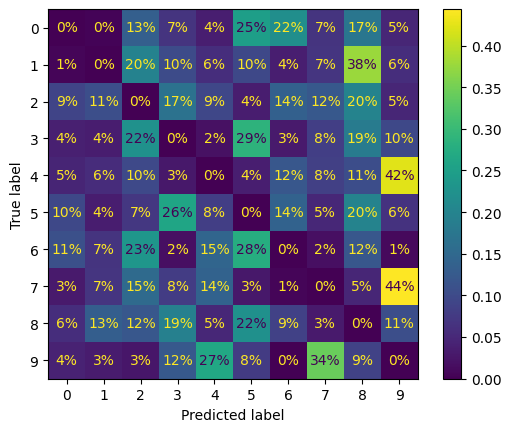

In [31]:
sample_weight = (y_train != y_valid_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred, sample_weight=sample_weight, normalize='true', values_format=".0%")

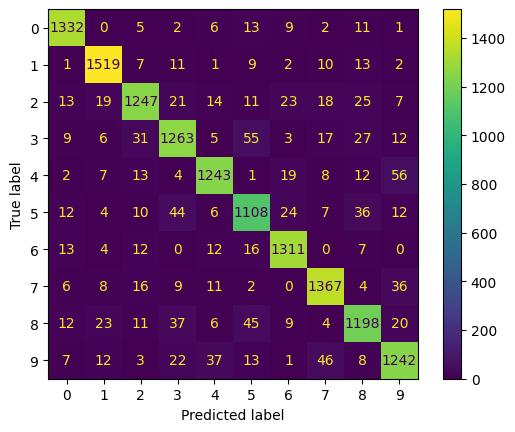

In [32]:
y_test_pred = log_cls.predict(X_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

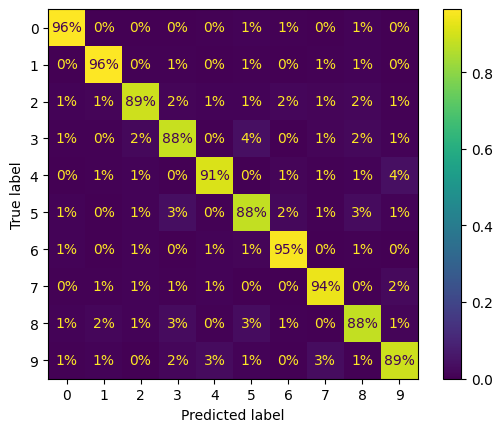

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, normalize='true', values_format=".0%")

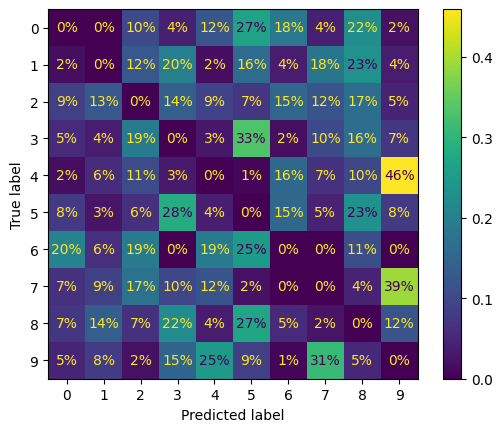

In [34]:
sample_weight = (y_test != y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, sample_weight=sample_weight, normalize='true', values_format=".0%")

In [35]:
from sklearn.pipeline import Pipeline

log_cls_pipe = Pipeline(steps=[
    ('scaling',StandardScaler()),
    ('model',LogisticRegression(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
])

In [36]:
log_cls_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [37]:
print(f'Train Accuracy: {log_cls_pipe.score(X_train,y_train)}')

val_score = cross_val_score(log_cls_pipe,X_train,y_train,cv=3,scoring='accuracy')
pd.DataFrame(val_score).describe()

Train Accuracy: 0.9448571428571428


,0
count,3.000000
mean,0.908393
std,0.000649
min,0.907698
25%,0.908097
50%,0.908497
75%,0.908740
max,0.908984


In [39]:
print(f'Test Accuracy: {log_cls_pipe.score(X_test,y_test)}')

Test Accuracy: 0.9164285714285715


In [57]:
best_model = log_cls_pipe.fit(X,y)
best_model

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [56]:
log_cls_pipe.fit(X,y)

print(f'Train Accuracy: {log_cls_pipe.score(X,y)}')

val_score = cross_val_score(log_cls_pipe,X,y,cv=3,scoring='accuracy')
pd.DataFrame(val_score).describe()

Train Accuracy: 0.9419285714285714


,0
count,3.000000
mean,0.911586
std,0.005746
min,0.907688
25%,0.908286
50%,0.908884
75%,0.913534
max,0.918185


In [38]:
import joblib

In [ ]:
joblib.dump(best_model,'hand_writen_detector_log_cls.pkl')

In [3]:
ff = joblib.load('hand_writen_detector_log_cls.pkl')

In [4]:
ff

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=42))])